# Extract Millions of Tweets without Twitter API

Code is written with the help of python library snscrape.

**snscrape** is a Python library that can be used to scrape tweets through Twitter's API without any restrictions or request limits. Moreover, you don't even need a Twitter developer account to scrape tweets when you use snscrape.

Check out this [easy-to-follow tutorial on how to scrape tweets using snscrape](http://https://www.youtube.com/watch?v=jtIMnmbnOFo&t=307s) on Youtube. Also checkout [snscrape on GitHub](http://https://github.com/JustAnotherArchivist/snscrape).

In [1]:
#!pip install snscrape
import snscrape.modules.twitter as snstwitter
import pandas as pd
from tqdm import tqdm

These are import statements for the required libraries.

In [2]:
start_date = pd.Timestamp('2012-01-01')
end_date = pd.Timestamp('now').floor('D')

These lines define the start and end dates for the Twitter search query. The start date is set to January 1st, 2012 and the end date is set to the current date, rounded down to the nearest day.

In [3]:
query = "Fantasy Premier League OR FPL since:{} until:{}".format(
    start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))

This line defines the search query to be used in the Twitter search. It searches for tweets containing either "Fantasy Premier League" or "FPL" between the start and end dates defined above.

In [4]:
limit = 10000

This line defines the number of tweets to be collected per year. The limit is set to 10,000 tweets per year.

In [5]:
tweets = []

This line initializes an empty list to store the tweets that will be collected.

In [6]:
# Loop over each year
for year in range(start_date.year, end_date.year+1):
    # Define the start and end dates for the current year
    year_start_date = pd.Timestamp('{}-01-01'.format(year))
    year_end_date = pd.Timestamp('{}-12-31'.format(year))

    # Define the query string for the current year
    year_query = "{} since:{} until:{}".format(query, year_start_date.strftime('%Y-%m-%d'), year_end_date.strftime('%Y-%m-%d'))

    # Loop over each tweet for the current year
    for tweet in tqdm(snstwitter.TwitterSearchScraper(year_query).get_items()):
        if len(tweets) >= limit*(year-start_date.year+1):
            break
        else:
            tweets.append([tweet.id,tweet.date,tweet.username, tweet.content,
                           tweet.hashtags,tweet.retweetCount,tweet.likeCount,
                           tweet.replyCount,tweet.source,
                           tweet.user.location,tweet.user.verified,
                           tweet.user.followersCount,tweet.user.friendsCount])
            

0it [00:00, ?it/s]Error retrieving https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22Fantasy%20Premier%20League%20OR%20FPL%20since%3A2012-01-01%20until%3A2023-09-13%20since%3A2012-01-01%20until%3A2012-12-31%22%2C%22count%22%3A20%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_ap

ScraperException: 4 requests to https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22Fantasy%20Premier%20League%20OR%20FPL%20since%3A2012-01-01%20until%3A2023-09-13%20since%3A2012-01-01%20until%3A2012-12-31%22%2C%22count%22%3A20%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%22%3Atrue%2C%22graphql_is_translatable_rweb_tweet_is_translatable_enabled%22%3Atrue%2C%22view_counts_everywhere_api_enabled%22%3Atrue%2C%22longform_notetweets_consumption_enabled%22%3Atrue%2C%22tweet_awards_web_tipping_enabled%22%3Afalse%2C%22freedom_of_speech_not_reach_fetch_enabled%22%3Afalse%2C%22standardized_nudges_misinfo%22%3Atrue%2C%22tweet_with_visibility_results_prefer_gql_limited_actions_policy_enabled%22%3Afalse%2C%22interactive_text_enabled%22%3Atrue%2C%22responsive_web_text_conversations_enabled%22%3Afalse%2C%22longform_notetweets_rich_text_read_enabled%22%3Afalse%2C%22longform_notetweets_inline_media_enabled%22%3Afalse%2C%22responsive_web_enhance_cards_enabled%22%3Afalse%2C%22responsive_web_twitter_blue_verified_badge_is_enabled%22%3Atrue%7D failed, giving up.

This line appends a list of tweet attributes to the tweets list for each tweet found in the search query. The tweet attributes include the ID, timestamp, username, text content, hashtags, retweet count, like count, reply count, source, user location, verified account status, number of followers, and number of accounts followed.

In [ ]:
df = pd.DataFrame(tweets, columns=['ID','Timestamp','User','Text',
                                   'Hashtag','Retweets','Likes',
                                   'Replies','Source',
                                   'Location','Verified_Account',
                                   'Followers','Following'])

This line creates a pandas DataFrame from the tweets list with columns labeled ID, Timestamp, User, Text, Hashtag, Retweets, Likes, Replies, Source, Location, Verified_Account, Followers, and Following. Each row of the DataFrame corresponds

Below screenshot shows how much time each chunk of 10K Tweets/year took to execute.


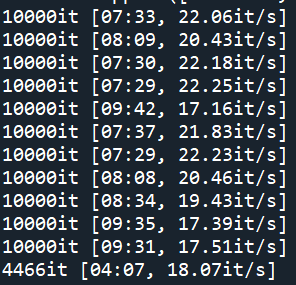

I was able to scrape 114,466 Tweets within 90mins roughly. 

##### Hope you find it useful. All feedbacks are welcomed. Please do check my other notebooks and datasets.

##### Happy Learning !